In [3]:
!pip install praw


In [31]:
!pip install vaderSentiment

In [56]:
import praw
import os
from dotenv import load_dotenv
from datetime import datetime
import pandas as pd

In [57]:
load_dotenv()

reddit = praw.Reddit(
    client_id=os.getenv("REDDIT_CLIENT_ID"),
    client_secret=os.getenv("REDDIT_CLIENT_SECRET"),
    user_agent=os.getenv("REDDIT_USER_AGENT")
)


In [58]:
def fetch_posts(subreddit_name, query="Bitcoin", limit=200):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []

    for post in subreddit.search(query, sort='new', limit=limit):
        posts.append({
            'subreddit': subreddit.display_name,
            'title': post.title,
            'created_utc': datetime.fromtimestamp(post.created_utc),
            'score': post.score,
            'num_comments': post.num_comments,
            'url': post.url
        })

    return pd.DataFrame(posts)


In [59]:
df = fetch_posts("CryptoCurrency", query="Bitcoin", limit=100)
df.to_csv("../data/reddit/reddit_bitcoin.csv", index=False)
df.head()

,subreddit,title,created_utc,score,num_comments,url
0,CryptoCurrency,Swiss National Bank chairman rebuffs Crypto as Reserve Asset,2025-04-26 16:37:31,5,2,https://www.reuters.com/business/finance/swiss-national-bank-chairman-rebuffs-bitcoin-reserve-asset-2025-04-25/
1,CryptoCurrency,Augury Report From The Ridgeline – Spring 2025,2025-04-26 14:32:35,3,1,https://www.reddit.com/r/CryptoCurrency/comments/1k8d1h0/augury_report_from_the_ridgeline_spring_2025/
2,CryptoCurrency,Bitcoin surges past $94K in explosive rally — bulls show no signs of slowing,2025-04-26 13:55:05,105,51,https://www.thestreet.com/crypto/policy/the-best-place-to-invest-bitcoin-soars-crypto-momentum-builds
3,CryptoCurrency,"Arthur Hayes Says Bitcoin Primed To Benefit Amid Trade War, Deglobalization and US-China Decoupling",2025-04-26 12:24:15,48,9,https://dailyhodl.com/2025/04/26/arthur-hayes-says-bitcoin-primed-to-benefit-amid-trade-war-deglobalization-and-us-china-decoupling-heres-how/
4,CryptoCurrency,Web3: Revolution in the World of the Internet and Cryptocurrencies,2025-04-26 07:43:32,0,2,https://www.reddit.com/r/CryptoCurrency/comments/1k86pos/web3_revolution_in_the_world_of_the_internet_and/


In [60]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   subreddit     100 non-null    object        
 1   title         100 non-null    object        
 2   created_utc   100 non-null    datetime64[ns]
 3   score         100 non-null    int64         
 4   num_comments  100 non-null    int64         
 5   url           100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.8+ KB


In [61]:
df.describe()



,created_utc,score,num_comments
count,100,100.000000,100.0000
mean,2025-04-21 14:46:32.959999744,213.730000,50.6300
min,2025-04-16 09:47:22,0.000000,0.0000
25%,2025-04-18 20:15:52,10.500000,6.0000
50%,2025-04-21 15:01:32.500000,64.500000,20.0000
75%,2025-04-24 11:23:25.500000,182.250000,50.2500
max,2025-04-26 16:37:31,2671.000000,893.0000
std,NaN,414.156069,104.2173


# Text Cleaning

In [62]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-z\s]", "", text)  # keep only letters and spaces
    text = re.sub(r"\s+", " ", text)      # remove extra spaces
    return text.strip()

df['clean_title'] = df['title'].apply(clean_text)



In [63]:
df.sort_values(by='score', ascending=False).head(10)

,subreddit,title,created_utc,score,num_comments,url,clean_title
69,CryptoCurrency,Ethereum is down 74% against Bitcoin since switching from PoW to PoS in 2022,2025-04-19 11:18:58,2671,893,https://www.reddit.com/gallery/1k2t4a7,ethereum is down against bitcoin since switching from pow to pos in
64,CryptoCurrency,"A Weird Message Was Embedded in Bitcoin’s 666,666th Block — Turns Out It’s a Bible Verse",2025-04-19 18:01:11,1790,115,https://i.redd.it/8qaydq7sotve1.png,a weird message was embedded in bitcoins th block turns out its a bible verse
96,CryptoCurrency,"Trump’s White House return wipes out 34,000 Bitcoin millionaires in Q1 2025",2025-04-16 19:07:17,1516,197,https://finbold.com/trumps-white-house-return-wipes-out-34000-bitcoin-millionaires-in-q1-2025/,trumps white house return wipes out bitcoin millionaires in q
33,CryptoCurrency,"Satoshi Nakamoto announcing his departure from Bitcoin, exactly 14 years ago",2025-04-23 11:51:46,1396,148,https://i.redd.it/9x7g46klekwe1.png,satoshi nakamoto announcing his departure from bitcoin exactly years ago
43,CryptoCurrency,Just 0.27 BTC Puts You in Bitcoin’s Top 1.5%,2025-04-22 01:43:00,1208,136,https://i.redd.it/p119yfit8awe1.png,just btc puts you in bitcoins top
71,CryptoCurrency,"Gold added a trillion to its market cap in one day, that's all of Bitcoin...",2025-04-19 02:45:14,959,200,https://www.reddit.com/r/CryptoCurrency/comments/1k2lavn/gold_added_a_trillion_to_its_market_cap_in_one/,gold added a trillion to its market cap in one day thats all of bitcoin
57,CryptoCurrency,Bitcoin Braced For ‘Apocalyptic’ Price Shock After White House Confirms Fed Bombshell,2025-04-20 20:18:27,953,366,https://www.forbes.com/sites/digital-assets/2025/04/20/bitcoin-braced-for-apocalyptic-price-shock-after-white-house-confirms-fed-bombshell/,bitcoin braced for apocalyptic price shock after white house confirms fed bombshell
11,CryptoCurrency,"One of the oldest Bitcoin order books, posted 15 years ago. 2,500 BTC for $0.003 each ✨",2025-04-25 15:00:11,869,63,https://i.redd.it/tvf7uv5xlzwe1.png,one of the oldest bitcoin order books posted years ago btc for each
91,CryptoCurrency,Rare screenshot of a Subreddit where you could beg for Bitcoin at $100 in 2013 😂,2025-04-17 11:02:46,741,66,https://i.redd.it/62hu8u06cdve1.png,rare screenshot of a subreddit where you could beg for bitcoin at in
35,CryptoCurrency,"Bitcoin flips Amazon and Silver in Market Cap, Surges to 6th largest Asset globally, Google and NVIDIA next in line.",2025-04-23 08:25:11,611,75,https://i.redd.it/yx2ipmutdjwe1.jpeg,bitcoin flips amazon and silver in market cap surges to th largest asset globally google and nvidia next in line


# Apply VADER Sentiment

In [65]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

df['sentiment'] = df['clean_title'].apply(get_sentiment)

In [66]:
df.sort_values(by='score', ascending=False).head(10)

,subreddit,title,created_utc,score,num_comments,url,clean_title,sentiment
69,CryptoCurrency,Ethereum is down 74% against Bitcoin since switching from PoW to PoS in 2022,2025-04-19 11:18:58,2671,893,https://www.reddit.com/gallery/1k2t4a7,ethereum is down against bitcoin since switching from pow to pos in,0.0000
64,CryptoCurrency,"A Weird Message Was Embedded in Bitcoin’s 666,666th Block — Turns Out It’s a Bible Verse",2025-04-19 18:01:11,1790,115,https://i.redd.it/8qaydq7sotve1.png,a weird message was embedded in bitcoins th block turns out its a bible verse,-0.5574
96,CryptoCurrency,"Trump’s White House return wipes out 34,000 Bitcoin millionaires in Q1 2025",2025-04-16 19:07:17,1516,197,https://finbold.com/trumps-white-house-return-wipes-out-34000-bitcoin-millionaires-in-q1-2025/,trumps white house return wipes out bitcoin millionaires in q,0.0000
33,CryptoCurrency,"Satoshi Nakamoto announcing his departure from Bitcoin, exactly 14 years ago",2025-04-23 11:51:46,1396,148,https://i.redd.it/9x7g46klekwe1.png,satoshi nakamoto announcing his departure from bitcoin exactly years ago,0.0000
43,CryptoCurrency,Just 0.27 BTC Puts You in Bitcoin’s Top 1.5%,2025-04-22 01:43:00,1208,136,https://i.redd.it/p119yfit8awe1.png,just btc puts you in bitcoins top,0.2023
71,CryptoCurrency,"Gold added a trillion to its market cap in one day, that's all of Bitcoin...",2025-04-19 02:45:14,959,200,https://www.reddit.com/r/CryptoCurrency/comments/1k2lavn/gold_added_a_trillion_to_its_market_cap_in_one/,gold added a trillion to its market cap in one day thats all of bitcoin,0.0000
57,CryptoCurrency,Bitcoin Braced For ‘Apocalyptic’ Price Shock After White House Confirms Fed Bombshell,2025-04-20 20:18:27,953,366,https://www.forbes.com/sites/digital-assets/2025/04/20/bitcoin-braced-for-apocalyptic-price-shock-after-white-house-confirms-fed-bombshell/,bitcoin braced for apocalyptic price shock after white house confirms fed bombshell,-0.7906
11,CryptoCurrency,"One of the oldest Bitcoin order books, posted 15 years ago. 2,500 BTC for $0.003 each ✨",2025-04-25 15:00:11,869,63,https://i.redd.it/tvf7uv5xlzwe1.png,one of the oldest bitcoin order books posted years ago btc for each,0.0000
91,CryptoCurrency,Rare screenshot of a Subreddit where you could beg for Bitcoin at $100 in 2013 😂,2025-04-17 11:02:46,741,66,https://i.redd.it/62hu8u06cdve1.png,rare screenshot of a subreddit where you could beg for bitcoin at in,0.0000
35,CryptoCurrency,"Bitcoin flips Amazon and Silver in Market Cap, Surges to 6th largest Asset globally, Google and NVIDIA next in line.",2025-04-23 08:25:11,611,75,https://i.redd.it/yx2ipmutdjwe1.jpeg,bitcoin flips amazon and silver in market cap surges to th largest asset globally google and nvidia next in line,0.4939


# Extract the Date (for Aggregation)

In [67]:
df['date'] = pd.to_datetime(df['created_utc']).dt.date

In [68]:
df[['date', 'clean_title', 'sentiment']]

,date,clean_title,sentiment
0,2025-04-26,swiss national bank chairman rebuffs crypto as reserve asset,0.3612
1,2025-04-26,augury report from the ridgeline spring,0.0000
2,2025-04-26,bitcoin surges past k in explosive rally bulls show no signs of slowing,-0.2960
3,2025-04-26,arthur hayes says bitcoin primed to benefit amid trade war deglobalization and uschina decoupling,-0.2263
4,2025-04-26,web revolution in the world of the internet and cryptocurrencies,0.0000
...,...,...,...
95,2025-04-17,bitcoin is the perfect pyramid scheme,0.5719
96,2025-04-16,trumps white house return wipes out bitcoin millionaires in q,0.0000
97,2025-04-16,vaneck executive unveils massive bitcoin price target sees btc rising in just two years,0.0000
98,2025-04-16,global money supply has tripled bitcoins market cap this year,0.0000


## Filter low-engagement posts

In [49]:
df = df[df['score'] > 10]


# Aggregate Daily Sentiment

In [54]:
daily_sentiment = df.groupby('date').agg(
    avg_sentiment=('sentiment', 'mean'),
    post_volume=('sentiment', 'count')
).reset_index()

In [55]:
daily_sentiment

,date,avg_sentiment,post_volume
0,2025-04-16,0.000000,3
1,2025-04-17,-0.060091,11
2,2025-04-18,0.175471,7
3,2025-04-19,-0.162143,7
4,2025-04-20,-0.180367,6
5,2025-04-21,0.129675,8
6,2025-04-22,0.305050,6
7,2025-04-23,0.269700,6
8,2025-04-24,0.201786,7
9,2025-04-25,0.134389,9


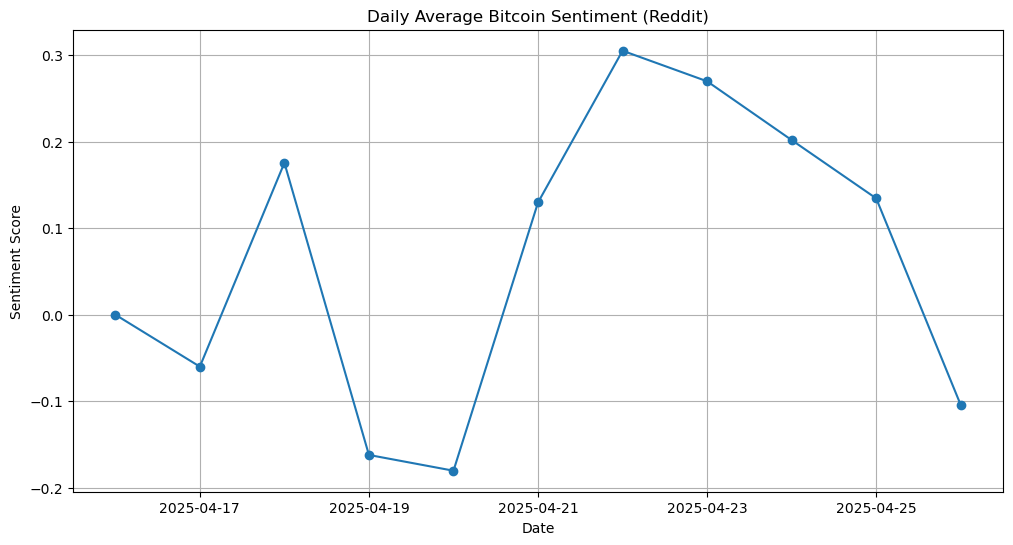

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_sentiment['date'], daily_sentiment['avg_sentiment'], marker='o')
plt.title('Daily Average Bitcoin Sentiment (Reddit)')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid()
plt.show()
